In [19]:
import re
import emoji

def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

def get_unicode(s):
    string_unicode = str(s)
    string_encode = string_unicode.encode("ascii", "ignore")
    string_decode = string_encode.decode()
    return string_decode

def process_tweets(text):
    txt = re.sub('@[\w]+','',tweets[0]['text'])
    rem_txt = re.sub(r"http\S+", "", txt)
    rem_txt_e = give_emoji_free_text(get_unicode(rem_txt))
    return rem_txt_e

In [36]:
#reference: CCC Assignment one

words_score = {}
words_index = {}


def get_word_and_score(text):
    last_space_pos = 0
    for i in range(len(text)):
        try:
            int(text[i:].split()[0])
            last_space_pos = i
            break
        except:
            continue
    return text[:last_space_pos], int(text[last_space_pos+1:])

file_words = open('AFINN.txt','r')
try:
    while True:
        text_line = file_words.readline()
        if text_line:
            word,score = get_word_and_score(text_line)
            words_score[word] = score
            index = word.split()[0]
            if words_index.get(index) is None:
                index_value = [word]
                words_index[index] = index_value
            else:
                words_index[index].append(word)
        else:
                break

finally:
    file_words.close()
                
def get_words_from_index(text):
    text_splited = text.split()
    afinn_words = {}
    afinn_phrase = {}
    words = []
    for word in text_splited:
        exact_word = get_exact_word(word)
        #print('word: ', word, ' exact word: ', exact_word)
        if words_index.get(exact_word) is not None:
            for afinn_word in words_index[exact_word]:
                if len(afinn_word.split()) > 1:
                    afinn_phrase[afinn_word] = None
                else:
                    afinn_words[afinn_word] = None
    for word in afinn_phrase.keys():
        words.append(word)
    for word in afinn_words.keys():
        words.append(word)
    return words

# Get the exact words from the splited tweet text with punctuations before or after the word removed
def get_exact_word(text):
    start = -1
    end = -1
    for i in range(len(text)):
        punctuation_index = '?.!,\'"'.find(text[i])
        if punctuation_index == -1 and start == -1:
            start = i
            continue
        if punctuation_index != -1 and start != -1:
            end = i
            break
    if end != -1:
        return text[start:end]
    else:
        return text[start:]


def get_score(content):    
    total_score = 0                
    for word in get_words_from_index(content):
        regex = "[' ']" + word + '[?.!,\'" ]|' + '^' + word + \
        '[?.!,\'" ]|' + "[' ']" + word + '$|' + '^' + word + '$'
        matches = re.findall(regex,content)
        score = words_score[word]
        if len(matches) != 0:
            content = content.replace(word,'')
        #print('matched words: ', matches, ' score: ',score)
        #print('tweet content: ',text)
        total_score += len(matches) * score
    return total_score


In [44]:
def get_hashtags(text):
    list_hash = [i  for i in str(text).split() if i.startswith("#")]
    return list_hash

In [1]:
# !pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cpu/stable 
# !git clone https://github.com/huggingface/torchMoji
# import os
# os.chdir('torchMoji')
# !pip3 install -e .

Looking in links: https://download.pytorch.org/whl/cpu/stable
     |████████████████████████████████| 560.1MB 18kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.0.1 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.0.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
Cloning into 'torchMoji'...
remote: Enumerating objects: 143, done.
remote: Total 143 (delta 0), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (143/143), 2.41 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Obtaining file:///content/torchMoji
     |████████████████████████████████| 5.0MB 28.9MB/s 
     |████████████████████████████████| 14.1MB 329kB/s 
     |████████████████████████████████| 9.3MB 23.6MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
  Created wheel for emoji: filename=e

In [2]:
# !python3 scripts/download_weights.py

About to download the pretrained weights file from https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0#
The size of the file is roughly 85MB. Continue? [y/n]
y
Downloading...
Running system call: wget https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0# -O /content/torchMoji/model/pytorch_model.bin
--2021-05-19 05:00:35--  https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/q8lax9ary32c7t9/pytorch_model.bin [following]
--2021-05-19 05:00:35--  https://www.dropbox.com/s/raw/q8lax9ary32c7t9/pytorch_model.bin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7718a8b202137760331f02f4c7.dl.dropboxusercontent.com/cd/0/inline/BOz_cebqVjs9UVc

In [4]:
# !python3 examples/text_emojize.py --text f" {sentence} "

In [47]:
# reference :https://github.com/huggingface/torchMoji/blob/master/examples/text_emojize.py

import numpy as np
import emoji, json
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from torchmoji.sentence_tokenizer import SentenceTokenizer
from torchmoji.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(PRETRAINED_PATH)
with open(VOCAB_PATH, 'r') as f:
    vocabulary = json.load(f)
st = SentenceTokenizer(vocabulary, 30)

def deepmojify(sentence,top_n =5):
    def top_elements(array, k):
        ind = np.argpartition(array, -k)[-k:]
        return ind[np.argsort(array[ind])][::-1]

    tokenized, _, _ = st.tokenize_sentences([sentence])
    prob = model(tokenized)[0]
    emoji_ids = top_elements(prob, top_n)
    emojis = map(lambda x: EMOJIS[x], emoji_ids)
    return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

def get_emoji(sentence):
    if sentence =="":
        return sentence
    else:
        return deepmojify(sentence).split()[-5:]

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)


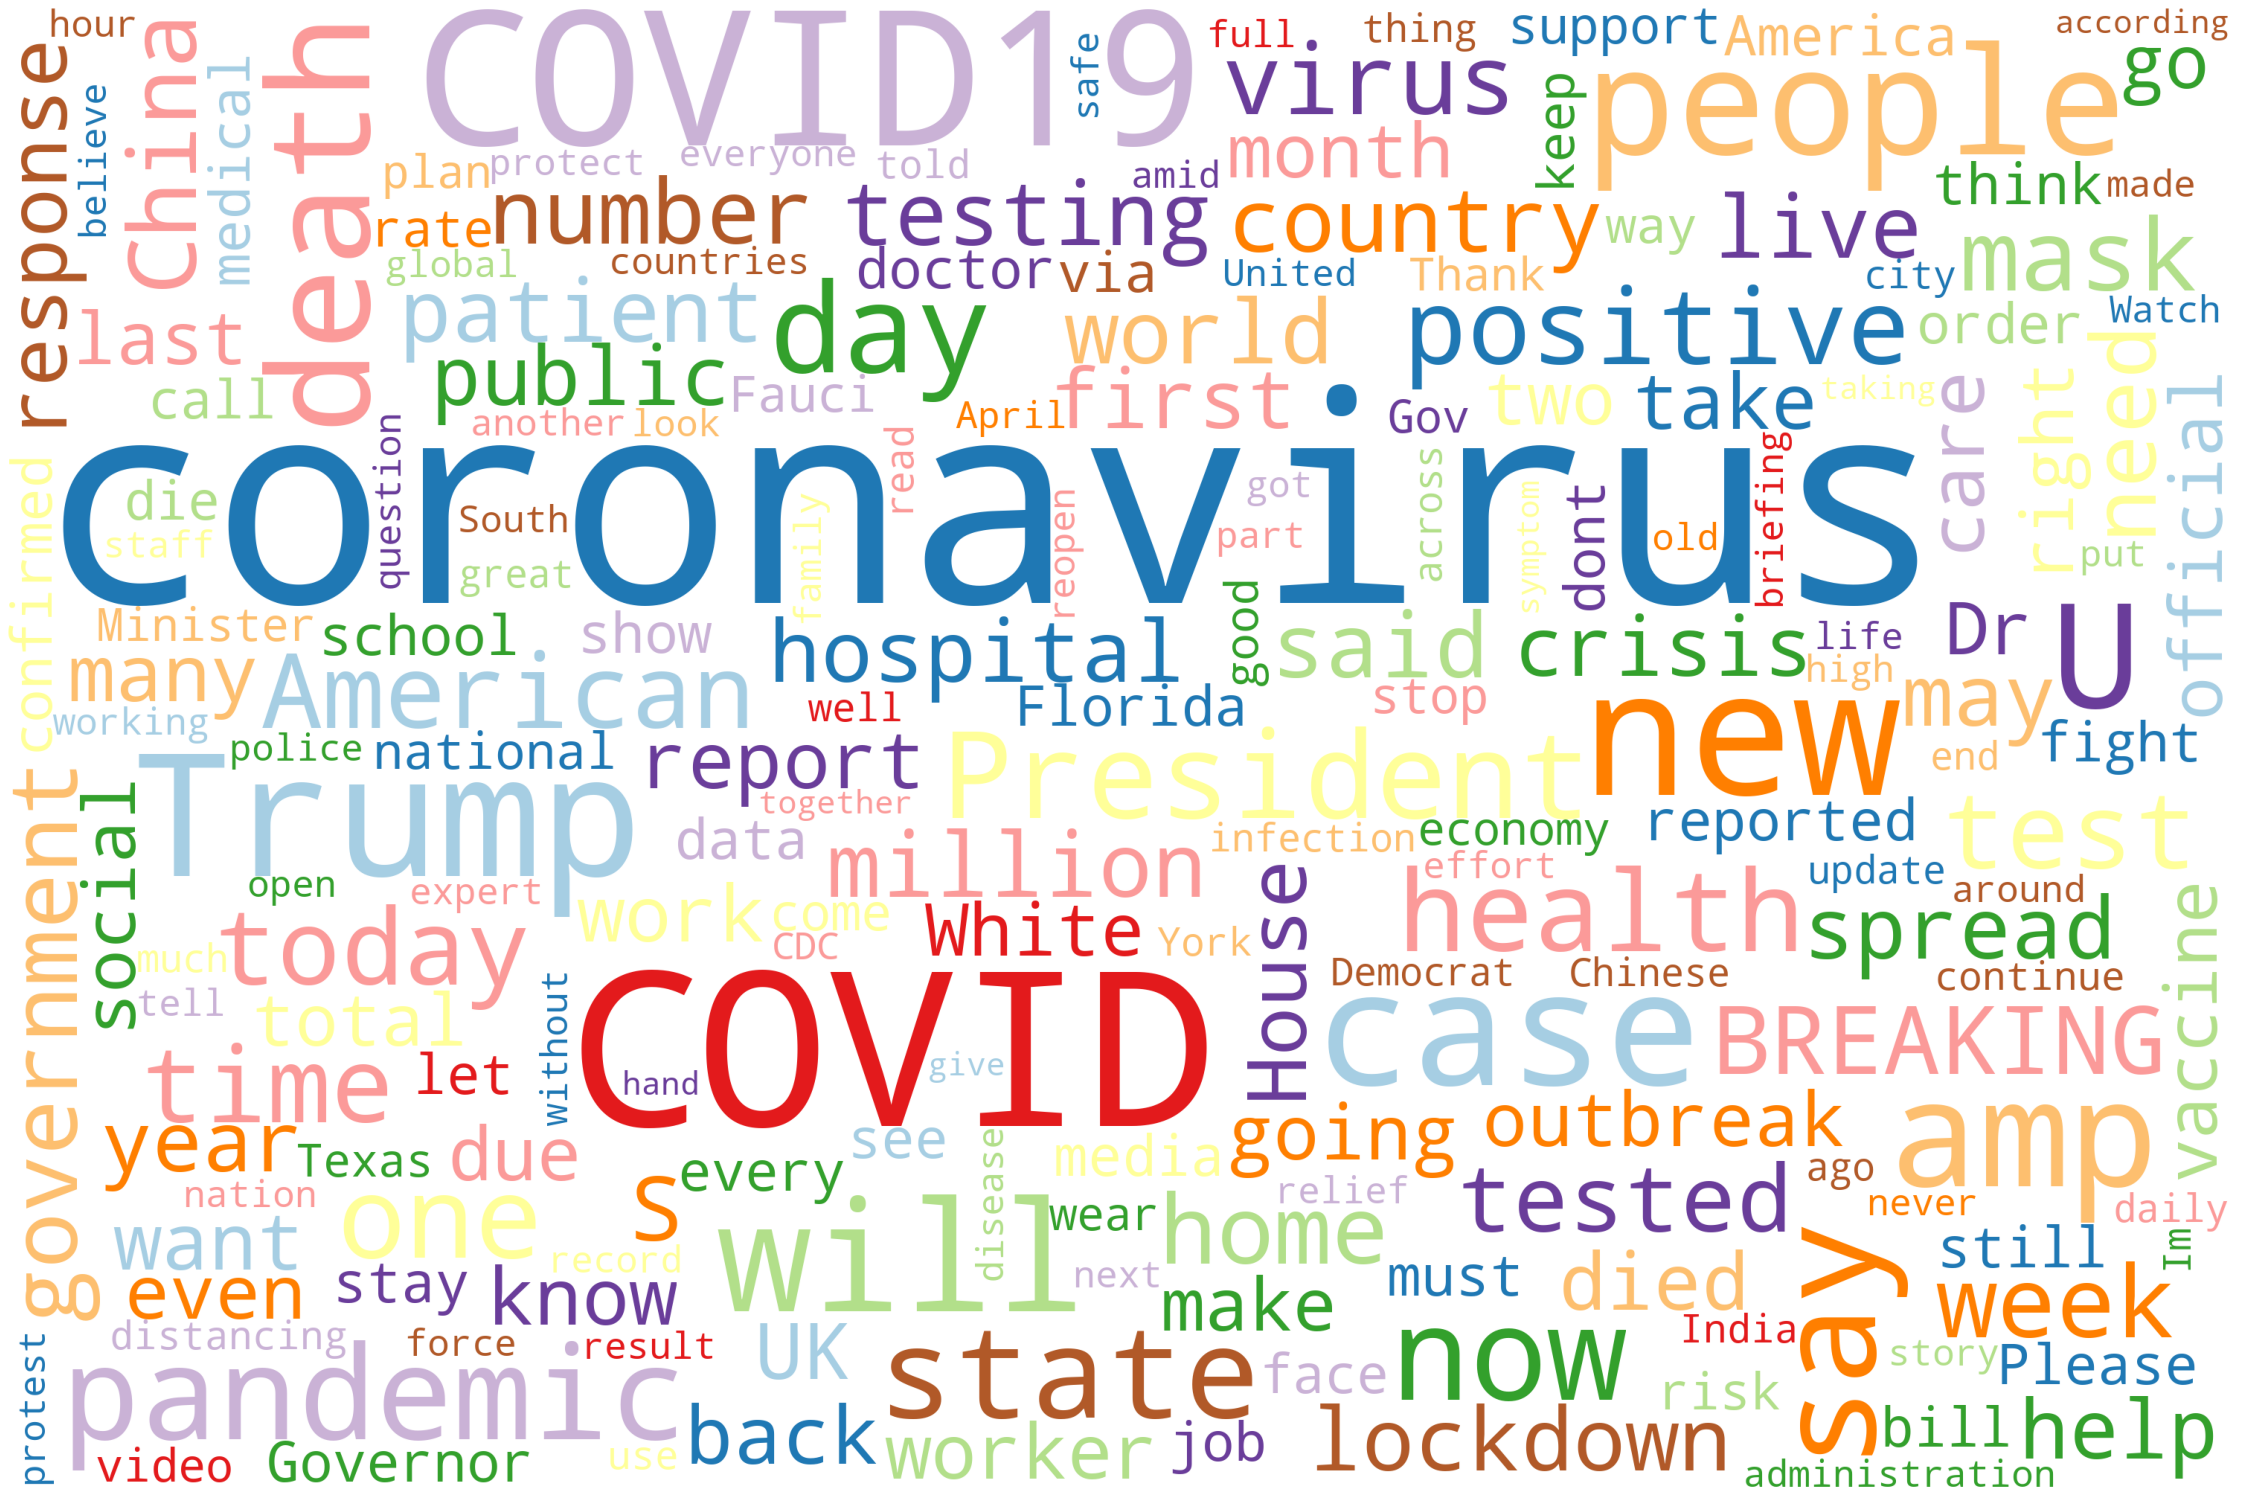

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
import pandas as pd 

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
pd_covid = pd.read_csv("Covid_rm_u.csv")
total_text = " ".join(str(s) for s in pd_covid['source'])


wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Paired', collocations=False, stopwords = STOPWORDS).generate(total_text)
# Plot
plot_cloud(wordcloud)

In [40]:
sample_text ="You know, #Donald says he has tested negative for #Coronavirus. But why should we believe him? He has lied over 16,000 times in the last three years! Why would he not be lying now?"

In [42]:
get_score(sample_text)

-4

In [45]:
get_hashtags(sample_text)

['#Donald', '#Coronavirus.']

In [48]:
get_emoji(sample_text)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


['😡', '😠', '😕', '😑', '😐']